In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy  import fcluster
import seaborn as sns

In [2]:
from google.colab import files
uploaded=files.upload()
#we can get the user to upload the file here

Saving fish.csv to fish.csv


In [3]:

df_fish=pd.read_csv('/content/fish.csv')
df_fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [5]:
# Assign proper column names
df_fish.columns = ["Species", "Weight", "Length1", "Length2", "Length3", "Height", "Width"]

# Preview the dataset
print(df_fish.head())

  Species  Weight  Length1  Length2  Length3  Height  Width
0   Bream   290.0     24.0     26.3     31.2    40.0   13.8
1   Bream   340.0     23.9     26.5     31.1    39.8   15.1
2   Bream   363.0     26.3     29.0     33.5    38.0   13.3
3   Bream   430.0     26.5     29.0     34.0    36.6   15.1
4   Bream   450.0     26.8     29.7     34.7    39.2   14.2


In [6]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  84 non-null     object 
 1   Weight   84 non-null     float64
 2   Length1  84 non-null     float64
 3   Length2  84 non-null     float64
 4   Length3  84 non-null     float64
 5   Height   84 non-null     float64
 6   Width    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


In [7]:
df_fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,434.017857,27.388095,29.607143,33.157143,27.953571,12.859524
std,382.648669,11.348058,12.249630,13.272086,10.351142,2.129377
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.325000,20.950000,23.550000,16.875000,10.875000
50%,390.000000,28.450000,30.850000,35.050000,26.900000,13.700000
75%,657.500000,32.725000,36.000000,40.675000,39.225000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [8]:
df_fish.shape

(84, 7)

In [9]:
df_fish.isna().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


In [10]:
df_fish.duplicated().sum()

np.int64(0)

In [12]:
df_fish.T.duplicated().sum()

np.int64(0)

In [13]:
df_fish.nunique()

,0
Species,4
Weight,65
Length1,71
Length2,61
Length3,71
Height,68
Width,45


In [14]:
num = df_fish.select_dtypes(include=['number']).columns.tolist()
print(num)

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


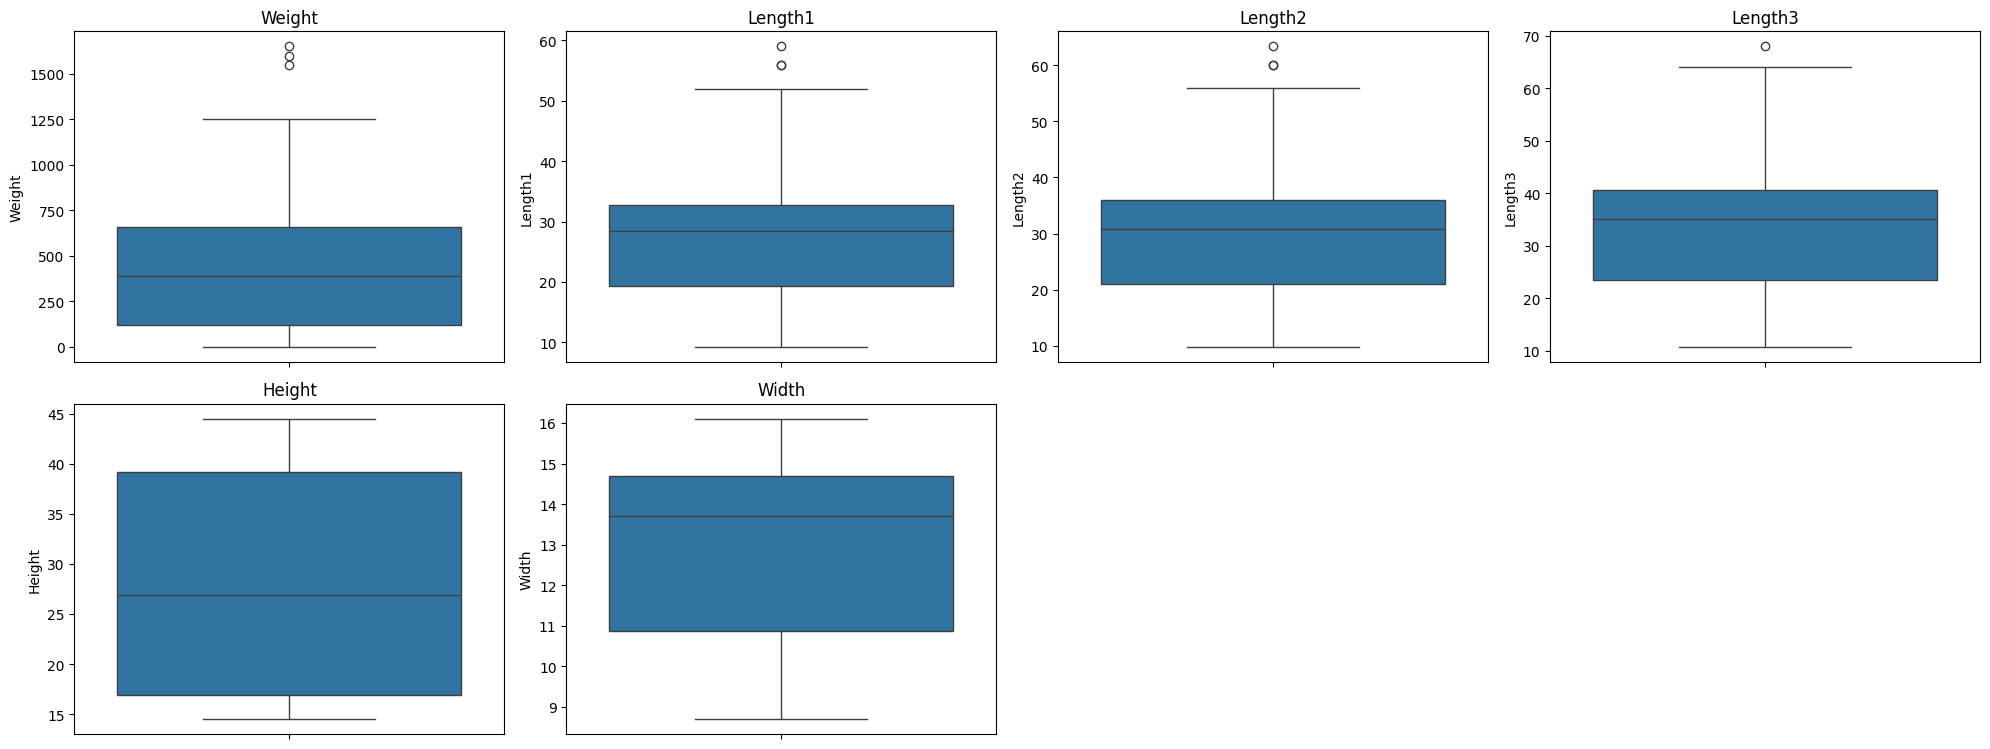

In [18]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num):
    plt.subplot(4, 4, i + 1)  # Arrange subplots in a 4x4 grid
    sns.boxplot(y=df_fish[col])   # Boxplot for the current column
    plt.title(col)           # Set column name as the title
plt.tight_layout()           # Adjust layout to prevent overlap
plt.show()

In [20]:
Q=['Weight', 'Length1', 'Length2', 'Length3','Height','Width']
# Calculate IQR and outlier limits for the specified column
Q1 = df_fish[Q].quantile(0.25)
Q3 = df_fish[Q].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR
print(Q1)
print(Q3)
print(IQR)
print(low_limit)
print(up_limit)

Weight     120.000
Length1     19.325
Length2     20.950
Length3     23.550
Height      16.875
Width       10.875
Name: 0.25, dtype: float64
Weight     657.500
Length1     32.725
Length2     36.000
Length3     40.675
Height      39.225
Width       14.700
Name: 0.75, dtype: float64
Weight     537.500
Length1     13.400
Length2     15.050
Length3     17.125
Height      22.350
Width        3.825
dtype: float64
Weight    -686.2500
Length1     -0.7750
Length2     -1.6250
Length3     -2.1375
Height     -16.6500
Width        5.1375
dtype: float64
Weight     1463.7500
Length1      52.8250
Length2      58.5750
Length3      66.3625
Height       72.7500
Width        20.4375
dtype: float64


In [21]:
non_outliers = ~((df_fish[Q] < low_limit) | (df_fish[Q] > up_limit)).any(axis=1)

In [22]:
df_fish_new=df_fish[non_outliers]

In [23]:
df_fish_new.shape

(81, 7)

K Means

In [24]:
x=df_fish_new.drop('Species',axis=1)
x

,Weight,Length1,Length2,Length3,Height,Width
0,290.0,24.0,26.3,31.2,40.0,13.8
1,340.0,23.9,26.5,31.1,39.8,15.1
2,363.0,26.3,29.0,33.5,38.0,13.3
3,430.0,26.5,29.0,34.0,36.6,15.1
4,450.0,26.8,29.7,34.7,39.2,14.2
...,...,...,...,...,...,...
76,500.0,42.0,45.0,48.0,14.5,10.2
77,567.0,43.2,46.0,48.7,16.0,10.0
78,770.0,44.8,48.0,51.2,15.0,10.5
79,950.0,48.3,51.7,55.1,16.2,11.2


In [25]:
X=df_fish.iloc[:,[3,4]].values

In [26]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

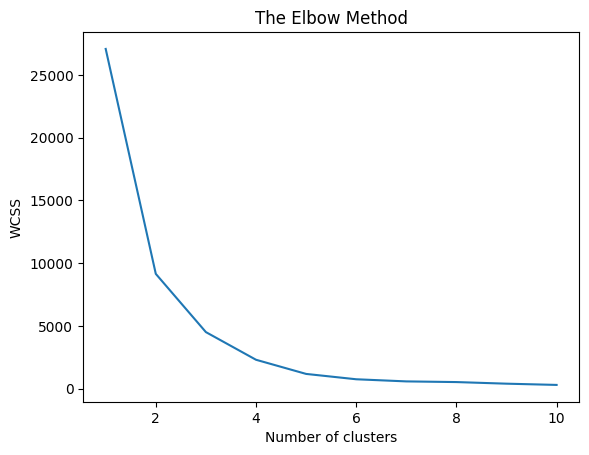

In [27]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
#from the elbow plot,we can fix values of k as 3
#building the kmeans clustering model
kmeans=KMeans(n_clusters=5,init='k-means++')#model building
#max_iter can be set if we need to fix the number of iterations
y_kmeans=kmeans.fit_predict(X)#output generation

In [29]:
df_fish['Cluster']=y_kmeans
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Cluster
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8,3
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1,3
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3,0
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1,0
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2,0


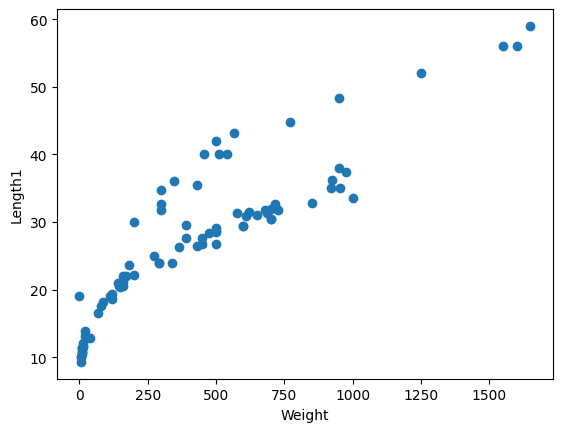

In [30]:
#before clustering
plt.scatter(df_fish['Weight'],df_fish['Length1'])
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

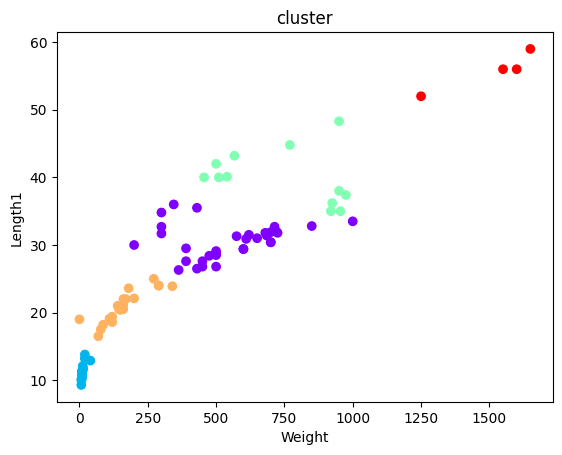

In [31]:
#after clustering
plt.scatter(df_fish['Weight'],df_fish['Length1'],c=df_fish['Cluster'],cmap='rainbow')
plt.title('cluster')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

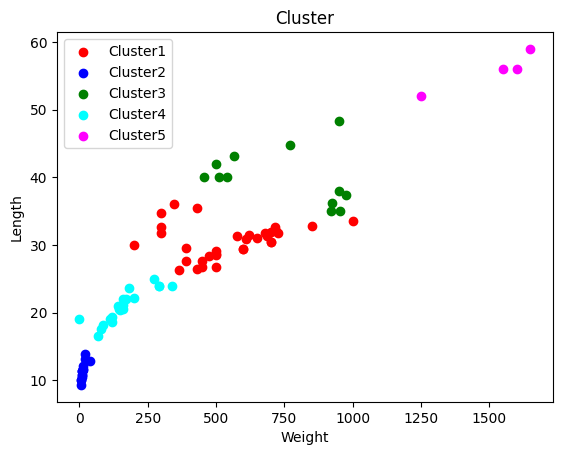

In [33]:
colors=['red','blue','green','cyan','magenta']
for i in range(5):
 cluster_data=df_fish[df_fish['Cluster']==i]
 plt.scatter(cluster_data['Weight'],cluster_data['Length1'],c=colors[i],label=f'Cluster{i+1}')
plt.legend()
plt.title('Cluster')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

In [38]:
#predict the cluster
def predict_cluster(length2, length3):
  new_data=[[length2, length3]]
  cluster= kmeans.predict(new_data)
  return cluster[0]

In [40]:
predicted_cluster=predict_cluster(20,30)
print("values belong to the cluster",predicted_cluster)

values belong to the cluster 3


Agglomerative Hierarchial Clustering

In [41]:
ag_cluster=linkage(X,method='ward')

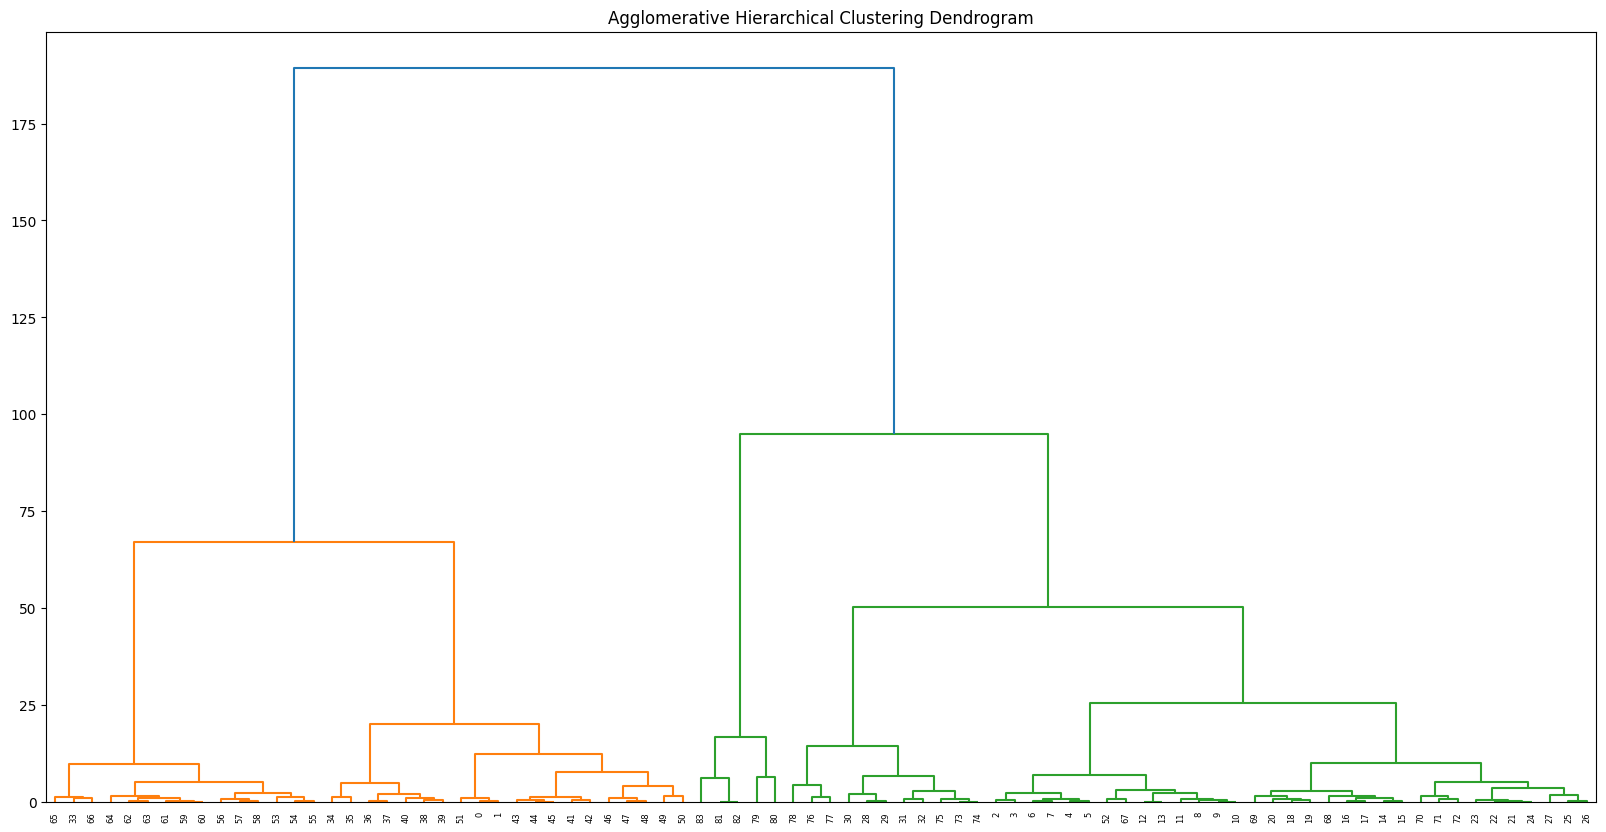

In [42]:
plt.figure(figsize=(20,10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.axhline(y=200, color='y',linestyle='--')
dendrogram(ag_cluster)
plt.show()

In [45]:
cluster_labels=fcluster(ag_cluster,t=200,criterion='distance')
df_fish['Cluster_Agglomerative']=cluster_labels
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Cluster,Cluster_Agglomerative
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8,3,1
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1,3,1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3,0,1
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1,0,1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2,0,1


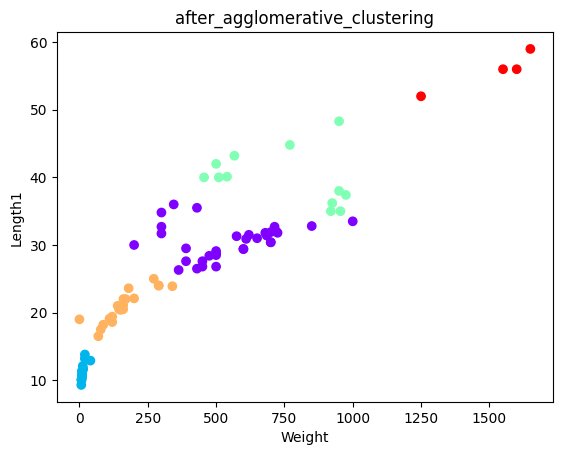

In [47]:
#after clustering
plt.scatter(df_fish['Weight'],df_fish['Length1'],c=df_fish['Cluster'],cmap='rainbow')
plt.title('after_agglomerative_clustering')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

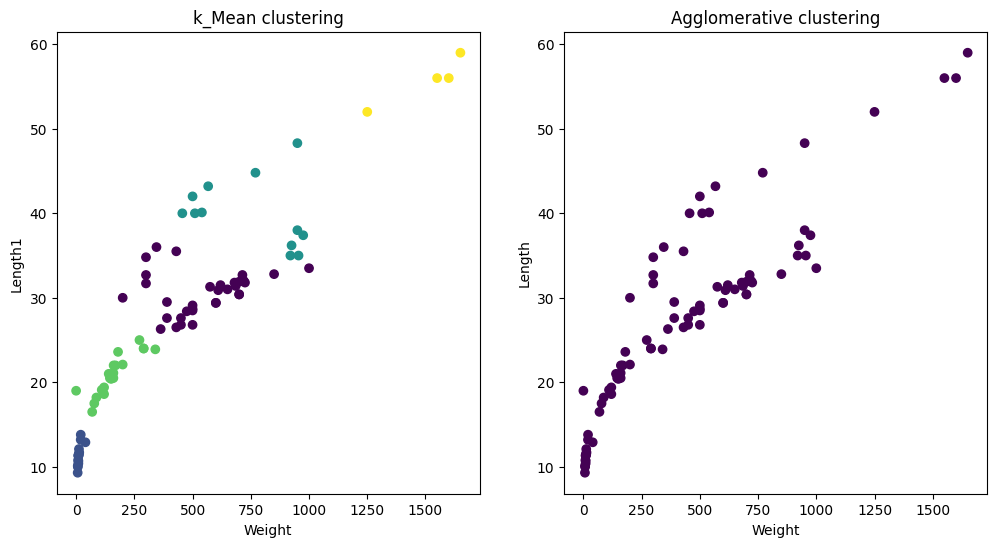

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(df_fish['Weight'],
            df_fish['Length1'],
            c=df_fish['Cluster'])
plt.title('k_Mean clustering')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.subplot(1,2,2)
plt.scatter(df_fish['Weight'],
            df_fish['Length1'],
            c=df_fish['Cluster_Agglomerative'])
plt.title('Agglomerative clustering')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()